In [1]:
import os
from itertools import cycle
import ipympl

import pandas as pd
import matplotlib as mpl

# mpl.use('Agg')
# %matplotlib widget
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import AutoMinorLocator
from matplotlib import colors
import numpy as np
import seaborn as sb
from scipy import interpolate

import locale
# locale.setlocale(locale.LC_NUMERIC, "de_DE.UTF-8")
locale.setlocale(locale.LC_NUMERIC, "en_US.UTF-8")

# Use LaTex style
mpl.style.use('monitor')

# FIGRATIO = 1.0/1.618 # Golden Ratio
# FIGRATIO = 1.0/np.sqrt(2) # DIN
FIGRATIO = 0.8
STD_MULT = 25

TEXTWIDTH = 314.403 / 72 # inches
FIGWIDTH = TEXTWIDTH
FIGWIDTH *= 3

############################
# SET PATHS HERE
############################

# Read data file
folder = "<Folder containing the light fields>"

csv_flat_filename = "<path to evaluation CSV>"
csv_shifted_filename = "<path to evaluation CSV with real image depth>"

df = pd.read_csv(os.path.join(folder, csv_flat_filename))
df_shifted = pd.read_csv(os.path.join(folder, csv_shifted_filename))

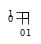

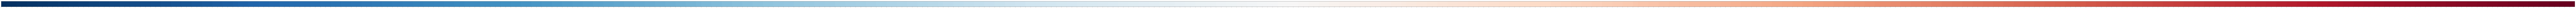

In [2]:
# Get colors from color cycle
fig, ax = plt.subplots(figsize=(0.1,0.1))
color_cycle = ax._get_lines.prop_cycler

COLOR_1 = next(color_cycle)['color']
COLOR_2 = next(color_cycle)['color']
COLOR_3 = next(color_cycle)['color']

custom_cmap = colors.LinearSegmentedColormap.from_list("", [COLOR_1, COLOR_2])
custom_cmap_col1 = colors.LinearSegmentedColormap.from_list("", ["white", COLOR_1])
custom_cmap_col2 = colors.LinearSegmentedColormap.from_list("", ["white", COLOR_2])
custom_cmap_col3 = colors.LinearSegmentedColormap.from_list("", ["white", COLOR_3])

sb.palplot(sb.color_palette("RdBu_r", 500))
sb_cmap = sb.color_palette("RdBu_r", 10_000)

# Evaluation

## Ideal Flat Surfaces

In [4]:
df.head()

filepath       scene  sensor_size  \
0  colorchart_ON-PYTHON-25K_lightfield_f-1-4_disp...  colorchart  [5120 5120]   
1  colorchart_ON-PYTHON-25K_lightfield_f-1-4_disp...  colorchart  [5120 5120]   
2  colorchart_ON-PYTHON-25K_lightfield_f-1-4_disp...  colorchart  [5120 5120]   
3  colorchart_ON-PYTHON-25K_lightfield_f-1-4_disp...  colorchart  [5120 5120]   
4  colorchart_ON-PYTHON-25K_lightfield_f-1-4_disp...  colorchart  [5120 5120]   

   pixel_pitch  num_channels  focal_length  f_number  r_main_lens  \
0     0.000005            16          0.05       1.4     0.017857   
1     0.000005            16          0.05       1.4     0.017857   
2     0.000005            16          0.05       1.4     0.017857   
3     0.000005            16          0.05       1.4     0.017857   
4     0.000005            16          0.05       1.4     0.017857   

   r_microlens  num_u_lenses  num_v_lenses  disparity  distance  num_ang_step  \
0     0.000029           393           393          2  1.174040            11   
1     0.000029           393           393          2  1.174040            11   
2     0.000034           341           341          2  0.881834            13   
3     0.000034           341           341          2  0.881834            13   
4     0.000025           465           465          3  1.093183             9   

      mask  perc_reconstructed       PSNR       MAE  
0   random            0.997054  48.066459  0.001791  
1  regular            0.261428  19.527553  0.035484  
2   random            0.999339  49.903249  0.001563  
3  regular            0.266095  19.653548  0.034997  
4   random            0.981982  41.751256  0.002008

### Get Mean PSNR across scenes for same camera parameters

In [6]:
group = df.groupby(["f_number", "disparity", "num_ang_step", "mask"])
group_shifted = df_shifted.groupby(["f_number", "disparity", "num_ang_step", "mask"])

In [7]:
PSNR_mean = group['PSNR', 'perc_reconstructed'].mean().reset_index()
PSNR_mean_shifted = group_shifted['PSNR', 'perc_reconstructed'].mean().reset_index()
PSNR_mean

f_number  disparity  num_ang_step     mask       PSNR  perc_reconstructed
0        1.4          2            11   random  50.097611            0.997009
1        1.4          2            11  regular  23.134566            0.261428
2        1.4          2            13   random  51.696266            0.999329
3        1.4          2            13  regular  23.228159            0.266095
4        1.4          3             9   random  46.550766            0.981667
5        1.4          3             9  regular  52.259389            0.999802
6        1.4          3            11   random  43.435414            0.996255
7        1.4          3            11  regular  44.555254            0.999723
8        1.4          4             7   random  41.665127            0.918632
9        1.4          4             7  regular  11.561216            0.062500
10       1.4          4             9   random  46.677114            0.980681
11       1.4          4             9  regular  11.364843            0.066801
12       1.4          5             7   random  41.800174            0.917058
13       1.4          5             7  regular  52.259001            0.999632
14       1.4          6             7   random  41.878092            0.915472
15       1.4          6             7  regular  12.356517            0.249979
16       1.4          7             5   random  35.502258            0.734429
17       1.4          7             5  regular  42.816469            0.929047
18       1.8          2            11   random  50.658100            0.996857
19       1.8          2            11  regular  23.174557            0.261428
20       1.8          3             9   random  47.019477            0.981793
21       1.8          3             9  regular  52.989535            0.999802
22       1.8          4             7   random  41.816692            0.918460
23       1.8          4             7  regular  11.439795            0.062500
24       1.8          5             7   random  37.356073            0.917239
25       1.8          5             7  regular  42.330773            0.999632
26       1.8          6             5   random  35.430990            0.735444
27       1.8          6             5  regular  23.289485            0.256122
28       1.8          7             5   random  35.655538            0.734530
29       1.8          7             5  regular  43.190732            0.929047

In [8]:
PSNR_std = group['PSNR', 'perc_reconstructed'].std().reset_index()
PSNR_std_shifted = group_shifted['PSNR', 'perc_reconstructed'].std().reset_index()
PSNR_std.head(2)

f_number  disparity  num_ang_step     mask      PSNR  perc_reconstructed
0       1.4          2            11   random  6.022862            0.000122
1       1.4          2            11  regular  5.951719            0.000000

## Join Values of flat and shifted PSNR

In [9]:
tmp = PSNR_mean[PSNR_mean['mask'] == 'random']
tmp_shifted = PSNR_mean_shifted[PSNR_mean_shifted['mask'] == 'random']
tmp_shifted['PSNR_shifted'] = tmp_shifted['PSNR'] 
del tmp_shifted['PSNR'] 

tmp['PSNR_shifted'] = tmp_shifted['PSNR_shifted']

# Swap columns 4 and 5
cols = list(tmp)
cols[5], cols[4] = cols[4], cols[5]

PSNR_random = tmp.loc[:,cols]
del PSNR_random['mask']
PSNR_random['perc_reconstructed'] = 100*PSNR_random['perc_reconstructed']

PSNR_random

/home/schambach/.conda/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/schambach/.conda/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


f_number  disparity  num_ang_step  perc_reconstructed       PSNR  \
0        1.4          2            11           99.700872  50.097611   
2        1.4          2            13           99.932900  51.696266   
4        1.4          3             9           98.166696  46.550766   
6        1.4          3            11           99.625483  43.435414   
8        1.4          4             7           91.863156  41.665127   
10       1.4          4             9           98.068141  46.677114   
12       1.4          5             7           91.705805  41.800174   
14       1.4          6             7           91.547235  41.878092   
16       1.4          7             5           73.442895  35.502258   
18       1.8          2            11           99.685657  50.658100   
20       1.8          3             9           98.179321  47.019477   
22       1.8          4             7           91.846000  41.816692   
24       1.8          5             7           91.723884  37.356073   
26       1.8          6             5           73.544357  35.430990   
28       1.8          7             5           73.453012  35.655538   

    PSNR_shifted  
0      47.128281  
2      47.920694  
4      43.407952  
6      42.294471  
8      38.958347  
10     42.604110  
12     38.878085  
14     38.856305  
16     33.718430  
18     47.250863  
20     43.371494  
22     39.146870  
24     36.367479  
26     33.565321  
28     33.593334

## Mean PSNR drop

In [10]:
diff = np.asarray(PSNR_random['PSNR'] - PSNR_random['PSNR_shifted'])
diff.mean()

2.6785103451443013

In [11]:
# Print Latex Table
print(PSNR_random.sort_values(by='perc_reconstructed', ascending=False).round(2).to_latex(index=False, decimal='.'))

\begin{tabular}{rrrrrr}
\toprule
 f\_number &  disparity &  num\_ang\_step &  perc\_reconstructed &   PSNR &  PSNR\_shifted \\
\midrule
      1.4 &          2 &            13 &               99.93 &  51.70 &         47.92 \\
      1.4 &          2 &            11 &               99.70 &  50.10 &         47.13 \\
      1.8 &          2 &            11 &               99.69 &  50.66 &         47.25 \\
      1.4 &          3 &            11 &               99.63 &  43.44 &         42.29 \\
      1.8 &          3 &             9 &               98.18 &  47.02 &         43.37 \\
      1.4 &          3 &             9 &               98.17 &  46.55 &         43.41 \\
      1.4 &          4 &             9 &               98.07 &  46.68 &         42.60 \\
      1.4 &          4 &             7 &               91.86 &  41.67 &         38.96 \\
      1.8 &          4 &             7 &               91.85 &  41.82 &         39.15 \\
      1.8 &          5 &             7 &               91.72 & 

# Plots

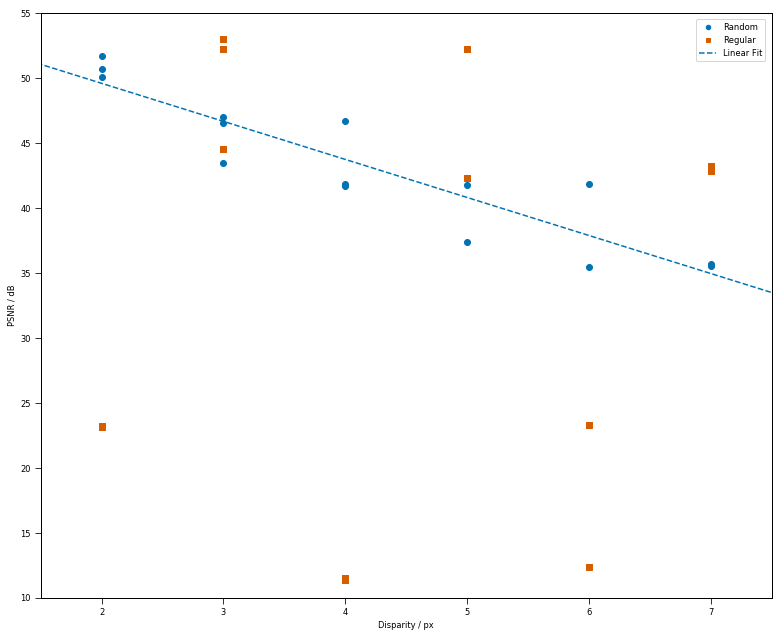

In [33]:
fig = plt.figure(figsize=(FIGWIDTH, FIGRATIO*FIGWIDTH))
ax = plt.subplot(111)


color = []
for mask, marker in zip(['random', 'regular'], ['o', 's']): 
    # Cycle Color
    base_plot, = ax.plot((-1, -1), (-1, -1), marker, label=mask.title())
    color.append(base_plot.get_color())
    
    for f_num in [1.4, 1.8]:
#         if not mask == 'random':
#             marker_plot, = ax.plot((-1, -1), (-1, -1), marker, color='black', label="f/"+str(f_num))
        
        data = PSNR_mean[(PSNR_mean['f_number'] == f_num) & (PSNR_mean['mask'] == mask)]
        data_std = PSNR_std[(PSNR_mean['f_number'] == f_num) & (PSNR_mean['mask'] == mask)]
        
        plt.scatter(data['disparity'], data['PSNR'], color=base_plot.get_color(), marker=marker, label=None)
        # plt.plot(data['disparity'], data['PSNR'], color=base_plot.get_color(), marker=marker, label=None)
        
        
# Least Squares Estimate
tmp = PSNR_mean[(PSNR_mean['mask'] == 'random')]
x_ = np.asarray(tmp['disparity'])
y_ = np.asarray(tmp['PSNR'])

A_ = np.vstack([x_, np.ones(len(x_))]).T
m_, c_ = np.linalg.lstsq(A_, y_, rcond=None)[0]


tmp_x_ = np.linspace(0, 10, 100)
tmp_y_ = m_*tmp_x_ + c_
ax.plot(tmp_x_, tmp_y_, '--', color=color[0], label='Linear Fit')


ax.set_xlabel("Disparity / px")
ax.set_ylabel("PSNR / dB")

ax.set_xlim(1.5, 7.5)
ax.set_ylim(10, 55)


plt.legend()

### PSNR over PERC_RECONSTRUCTED

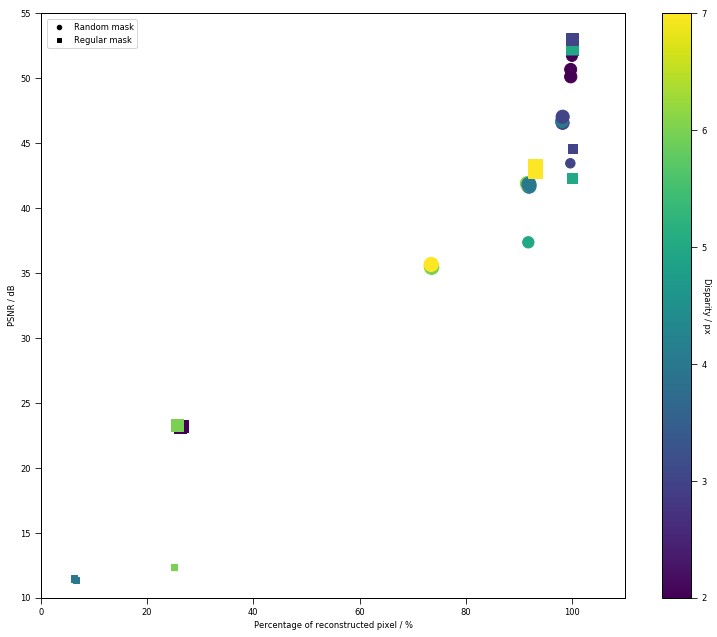

In [13]:
fig = plt.figure(figsize=(FIGWIDTH, FIGRATIO*FIGWIDTH))
ax = plt.subplot(111)


color = []
for mask, marker in zip(['random', 'regular'], ['o', 's']): 

    base_plot, = ax.plot((-1, -1), (-1, -1), marker, label=mask.title() + " mask", color='black')

    data = PSNR_mean[(PSNR_mean['mask'] == mask)]
    data_std = PSNR_std[(PSNR_mean['mask'] == mask)]
    

    plt.scatter(100*data['perc_reconstructed'], data['PSNR'], s=STD_MULT*data_std['PSNR'] ,c=np.asarray(data['disparity']), marker=marker, label=None)
    # plt.plot(data['disparity'], data['PSNR'], color=base_plot.get_color(), marker=marker, label=None)
        
        



ax.set_xlabel("Percentage of reconstructed pixel / %")
ax.set_ylabel("PSNR / dB")

ax.set_xlim(0, 110)
ax.set_ylim(10, 55)

cbar = plt.colorbar()
cbar.ax.set_ylabel('Disparity / px', rotation=270)

plt.legend()

### Find best 3 parametrs for random mask

In [14]:
PSNR_mean[PSNR_mean['mask'] == 'random'].sort_values('PSNR', ascending=False)

f_number  disparity  num_ang_step    mask       PSNR  perc_reconstructed
2        1.4          2            13  random  51.696266            0.999329
18       1.8          2            11  random  50.658100            0.996857
0        1.4          2            11  random  50.097611            0.997009
20       1.8          3             9  random  47.019477            0.981793
10       1.4          4             9  random  46.677114            0.980681
4        1.4          3             9  random  46.550766            0.981667
6        1.4          3            11  random  43.435414            0.996255
14       1.4          6             7  random  41.878092            0.915472
22       1.8          4             7  random  41.816692            0.918460
12       1.4          5             7  random  41.800174            0.917058
8        1.4          4             7  random  41.665127            0.918632
24       1.8          5             7  random  37.356073            0.917239
28       1.8          7             5  random  35.655538            0.734530
16       1.4          7             5  random  35.502258            0.734429
26       1.8          6             5  random  35.430990            0.735444

In [15]:
PSNR_mean_shifted[PSNR_mean_shifted['mask'] == 'random'].sort_values('PSNR', ascending=False)

f_number  disparity  num_ang_step    mask       PSNR  perc_reconstructed
2        1.4          2            13  random  47.920694            0.999343
18       1.8          2            11  random  47.250863            0.996812
0        1.4          2            11  random  47.128281            0.996845
4        1.4          3             9  random  43.407952            0.981853
20       1.8          3             9  random  43.371494            0.981679
10       1.4          4             9  random  42.604110            0.980391
6        1.4          3            11  random  42.294471            0.996257
22       1.8          4             7  random  39.146870            0.918596
8        1.4          4             7  random  38.958347            0.918289
12       1.4          5             7  random  38.878085            0.917174
14       1.4          6             7  random  38.856305            0.915848
24       1.8          5             7  random  36.367479            0.917267
16       1.4          7             5  random  33.718430            0.734529
28       1.8          7             5  random  33.593334            0.734534
26       1.8          6             5  random  33.565321            0.735633

### Average PSNR drop due to real scene

In [16]:
PSNRS = np.asarray([[50.66,  47.25],
[50.10, 47.13],
[47.02, 43.37],
[46.68, 42.60],
[46.55, 43.41],
[43.44, 42.29],
[41.88, 38.86],
[41.82, 39.12],
[41.80, 38.88],
[41.67, 38.96],
[37.36, 36.37],
[35.66, 33.59],
[35.50, 33.72],
[35.43, 33.57]])

In [17]:
np.mean(PSNRS[:, 0] - PSNRS[:, 1])

2.603571428571428

### Choose best parameter

In [18]:
f_num = 1.4
d = 2
N = 13

data = df[(df['f_number'] == f_num) & (df['disparity'] == d) & (df['num_ang_step'] == N) & (df['mask'] == 'random')].sort_values('scene')
data_shifted = df_shifted[(df_shifted['f_number'] == f_num) & (df_shifted['disparity'] == d) & (df_shifted['num_ang_step'] == N) & (df_shifted['mask'] == 'random')].sort_values('scene')

In [19]:
data.head()

filepath       scene  \
62   cd_ON-PYTHON-25K_lightfield_f-1-4_disp-2_numAn...          cd   
2    colorchart_ON-PYTHON-25K_lightfield_f-1-4_disp...  colorchart   
92   concrete_ON-PYTHON-25K_lightfield_f-1-4_disp-2...    concrete   
32   curry_ON-PYTHON-25K_lightfield_f-1-4_disp-2_nu...       curry   
122  grafitti_ON-PYTHON-25K_lightfield_f-1-4_disp-2...    grafitti   

     sensor_size  pixel_pitch  num_channels  focal_length  f_number  \
62   [5120 5120]     0.000005            16          0.05       1.4   
2    [5120 5120]     0.000005            16          0.05       1.4   
92   [5120 5120]     0.000005            16          0.05       1.4   
32   [5120 5120]     0.000005            16          0.05       1.4   
122  [5120 5120]     0.000005            16          0.05       1.4   

     r_main_lens  r_microlens  num_u_lenses  num_v_lenses  disparity  \
62      0.017857     0.000034           341           341          2   
2       0.017857     0.000034           341           341          2   
92      0.017857     0.000034           341           341          2   
32      0.017857     0.000034           341           341          2   
122     0.017857     0.000034           341           341          2   

     distance  num_ang_step    mask  perc_reconstructed       PSNR       MAE  
62   0.881834            13  random            0.999279  52.383598  0.001412  
2    0.881834            13  random            0.999339  49.903249  0.001563  
92   0.881834            13  random            0.999283  49.465194  0.001411  
32   0.881834            13  random            0.999404  47.131882  0.002334  
122  0.881834            13  random            0.999340  59.597408  0.000731

In [20]:
data_shifted.head()

filepath               scene  \
62  cd_shifted_ON-PYTHON-25K_lightfield_f-1-4_disp...          cd_shifted   
92  colorchart_shifted_ON-PYTHON-25K_lightfield_f-...  colorchart_shifted   
32  concrete_shifted_ON-PYTHON-25K_lightfield_f-1-...    concrete_shifted   
2   curry_shifted_ON-PYTHON-25K_lightfield_f-1-4_d...       curry_shifted   

    sensor_size  pixel_pitch  num_channels  focal_length  f_number  \
62  [5120 5120]     0.000005            16          0.05       1.4   
92  [5120 5120]     0.000005            16          0.05       1.4   
32  [5120 5120]     0.000005            16          0.05       1.4   
2   [5120 5120]     0.000005            16          0.05       1.4   

    r_main_lens  r_microlens  num_u_lenses  num_v_lenses  disparity  distance  \
62     0.017857     0.000034           341           341          2  0.881834   
92     0.017857     0.000034           341           341          2  0.881834   
32     0.017857     0.000034           341           341          2  0.881834   
2      0.017857     0.000034           341           341          2  0.881834   

    num_ang_step    mask  perc_reconstructed       PSNR       MAE  
62            13  random            0.999377  47.379570  0.001931  
92            13  random            0.999370  47.833349  0.001979  
32            13  random            0.999363  50.760523  0.001192  
2             13  random            0.999263  45.709334  0.002948

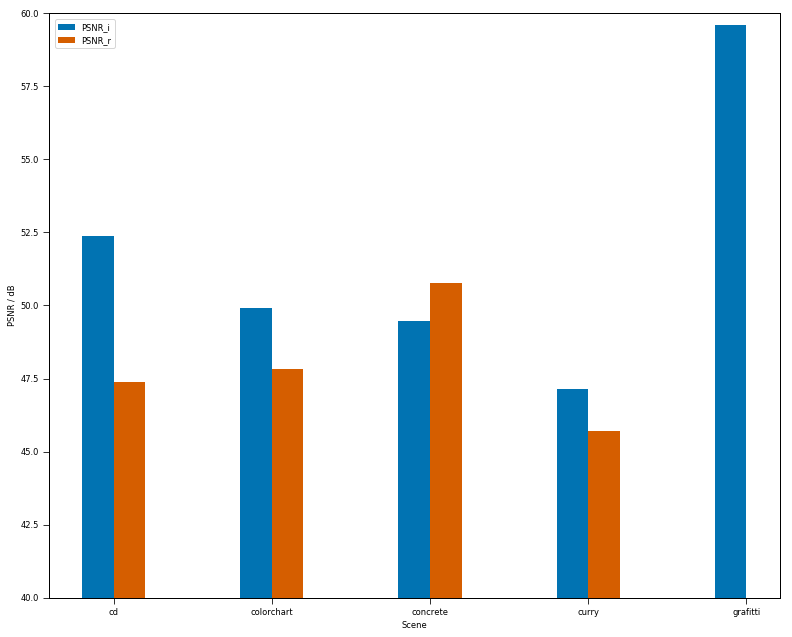

In [21]:
fig = plt.figure(figsize=(FIGWIDTH, FIGRATIO*FIGWIDTH))
ax = plt.subplot(111)

w = 0.2
ax.bar(data['scene'], data['PSNR'], width=-w, align='edge', label='PSNR_i')
ax.bar(data['scene'][:-1], data_shifted['PSNR'], width=w, align='edge', label='PSNR_r')


ax.set_xlabel("Scene")
ax.set_ylabel("PSNR / dB")

ax.set_ylim(40, 60)

plt.legend()